## Pull data from HDF5 file

In [1]:
import sys
sys.path.insert(0, '/root/')

In [2]:
from tpqoa import tpqoa
import numpy as np
import pandas as pd
import tables as tb
import tstables as tstb
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
h6 = pd.HDFStore('/root/pyalgocourse/test_project/data_features.h5','r')

In [4]:
data = h6['data']

In [5]:
h6.close()

## Split data into train, validate, test

In [6]:
data.head()

,AUDUSD,RSI,MACD,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,MOM1,MOM2
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 03:10:00,0.78318,63.690322,-0.000410,0.000651,0.000562,0.000102,0.000102,-0.000281,0.000384,-0.000345,...,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,0.000026,-0.000064,1.0,0.0
2018-01-02 03:20:00,0.78318,66.794347,-0.000446,0.000000,0.000651,0.000562,0.000102,0.000102,-0.000281,0.000384,...,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,0.000026,1.0,0.0
2018-01-02 03:30:00,0.78312,66.794347,-0.000465,-0.000077,0.000000,0.000651,0.000562,0.000102,0.000102,-0.000281,...,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,1.0,0.0
2018-01-02 03:40:00,0.78336,66.061838,-0.000493,0.000306,-0.000077,0.000000,0.000651,0.000562,0.000102,0.000102,...,0.000423,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,1.0,0.0
2018-01-02 03:50:00,0.78345,67.556195,-0.000515,0.000115,0.000306,-0.000077,0.000000,0.000651,0.000562,0.000102,...,0.000256,0.000423,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,1.0,0.0


In [7]:
len(data)

12077

In [8]:
test = data[9600:]

In [9]:
train = data[:7600]


In [10]:
validate = data[7600:9600]

In [11]:
cross_val = data[:9600]

## Backtest

In [12]:
from sklearn import linear_model
# https://www.inovancetech.com/how-to-trade-rsi.html
from sklearn import svm

In [13]:
# use this to drop some of the lagged returns, drop none, drop = 30, drop all, drop =0 
drop = 29
dropped = []
for drop in range(drop+1,30+1):
    drp = 'lag_%d' % drop
    dropped.append(drp)
cols = data.columns.drop(dropped)
cols = cols.drop(['AUDUSD','Returns'])
cols

Index(['RSI', 'MACD', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6',
       'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13',
       'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20',
       'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26', 'lag_27',
       'lag_28', 'lag_29', 'MOM1', 'MOM2'],
      dtype='object')

In [14]:
strat_train = train.copy()
strat_train.head()

,AUDUSD,RSI,MACD,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,MOM1,MOM2
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 03:10:00,0.78318,63.690322,-0.000410,0.000651,0.000562,0.000102,0.000102,-0.000281,0.000384,-0.000345,...,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,0.000026,-0.000064,1.0,0.0
2018-01-02 03:20:00,0.78318,66.794347,-0.000446,0.000000,0.000651,0.000562,0.000102,0.000102,-0.000281,0.000384,...,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,0.000026,1.0,0.0
2018-01-02 03:30:00,0.78312,66.794347,-0.000465,-0.000077,0.000000,0.000651,0.000562,0.000102,0.000102,-0.000281,...,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,1.0,0.0
2018-01-02 03:40:00,0.78336,66.061838,-0.000493,0.000306,-0.000077,0.000000,0.000651,0.000562,0.000102,0.000102,...,0.000423,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,1.0,0.0
2018-01-02 03:50:00,0.78345,67.556195,-0.000515,0.000115,0.000306,-0.000077,0.000000,0.000651,0.000562,0.000102,...,0.000256,0.000423,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,1.0,0.0


In [15]:
LinMod = linear_model.LogisticRegression(C=1e6)
# LinMod = svm.SVC(C = 1, probability = True)

In [16]:
LinMod.fit(strat_train[cols], np.sign(strat_train.loc[:,'Returns']))
# LinMod.fit(strat_train[cols],np.sign(strat_train.loc[:,'Returns']))

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [17]:
pred = LinMod.predict(strat_train[cols])

In [18]:
pred

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [19]:
strat_train.loc[:,'Position'] = pred

In [20]:
strat_train.loc[:,'Strategy'] = strat_train.loc[:,'Position'] * strat_train.loc[:,'Returns']

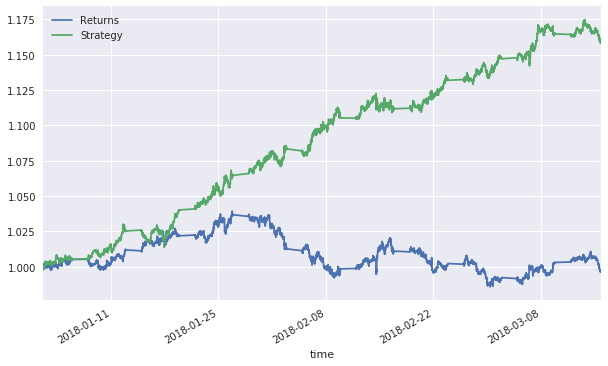

In [21]:
strat_train[['Returns','Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [22]:
mean = strat_train[['Returns','Strategy']].mean() * 6 * 24 * 252
mean

Returns    -0.017112
Strategy    0.702695
dtype: float64

## Run model on validation data

In [23]:
strat_valid = validate.copy()
strat_valid.head()

,AUDUSD,RSI,MACD,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,MOM1,MOM2
time,,,,,,,,,,,,,,,,,,,,,
2018-03-15 20:50:00,0.78002,34.726214,0.000444,0.000192,0.000282,-0.000038,-0.000436,-0.000244,0.000192,-0.000320,...,-0.000218,0.000090,-0.000128,-0.000960,-0.000038,-0.000333,0.000243,0.000026,1.0,0.0
2018-03-15 21:00:00,0.77989,37.003615,0.000421,-0.000167,0.000192,0.000282,-0.000038,-0.000436,-0.000244,0.000192,...,0.000167,-0.000218,0.000090,-0.000128,-0.000960,-0.000038,-0.000333,0.000243,1.0,0.0
2018-03-15 21:10:00,0.78021,35.864908,0.000372,0.000410,-0.000167,0.000192,0.000282,-0.000038,-0.000436,-0.000244,...,0.000256,0.000167,-0.000218,0.000090,-0.000128,-0.000960,-0.000038,-0.000333,0.0,0.0
2018-03-15 21:20:00,0.77993,40.590129,0.000353,-0.000359,0.000410,-0.000167,0.000192,0.000282,-0.000038,-0.000436,...,0.000064,0.000256,0.000167,-0.000218,0.000090,-0.000128,-0.000960,-0.000038,1.0,0.0
2018-03-15 21:30:00,0.77993,38.016778,0.000333,0.000000,-0.000359,0.000410,-0.000167,0.000192,0.000282,-0.000038,...,0.000231,0.000064,0.000256,0.000167,-0.000218,0.000090,-0.000128,-0.000960,0.0,0.0


In [24]:
pred = LinMod.predict(strat_valid[cols])

In [25]:
strat_valid.loc[:,'Position'] = pred

In [26]:
strat_valid.loc[:,'Strategy'] = strat_valid.loc[:,'Position'] * strat_valid.loc[:,'Returns']

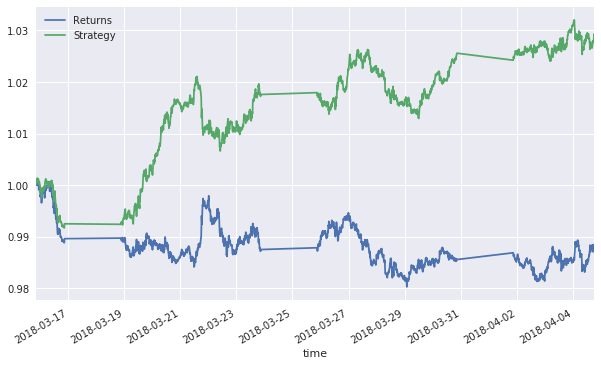

In [27]:
strat_valid[['Returns','Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [28]:
mean = strat_valid[['Returns','Strategy']].mean() * 6 * 24 * 252
mean

Returns    -0.219553
Strategy    0.518439
dtype: float64

## Cross validate the model using Scikit - learn

In [29]:
strat_crssval = cross_val.copy()
strat_crssval.head()

,AUDUSD,RSI,MACD,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,MOM1,MOM2
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 03:10:00,0.78318,63.690322,-0.000410,0.000651,0.000562,0.000102,0.000102,-0.000281,0.000384,-0.000345,...,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,0.000026,-0.000064,1.0,0.0
2018-01-02 03:20:00,0.78318,66.794347,-0.000446,0.000000,0.000651,0.000562,0.000102,0.000102,-0.000281,0.000384,...,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,0.000026,1.0,0.0
2018-01-02 03:30:00,0.78312,66.794347,-0.000465,-0.000077,0.000000,0.000651,0.000562,0.000102,0.000102,-0.000281,...,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,1.0,0.0
2018-01-02 03:40:00,0.78336,66.061838,-0.000493,0.000306,-0.000077,0.000000,0.000651,0.000562,0.000102,0.000102,...,0.000423,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,1.0,0.0
2018-01-02 03:50:00,0.78345,67.556195,-0.000515,0.000115,0.000306,-0.000077,0.000000,0.000651,0.000562,0.000102,...,0.000256,0.000423,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,1.0,0.0


In [30]:
# cross validation: estimating estimator performance

In [31]:
# Learning the parameters of a prediction function and testing it on the same data 
# is a methodological mistake: a model that would just repeat the labels of the 
# samples that it has just seen would have a perfect score but would fail to predict 
# anything useful on yet-unseen data. This situation is called overfitting. To avoid 
# it, it is common practice when performing a (supervised) machine learning experiment 
# to hold out part of the available data as a test set X_test, y_test

In [32]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
x_train, x_test, y_train, y_test = train_test_split(strat_crssval[cols], np.sign(strat_crssval.loc[:,'Returns']),
                                  random_state = 0, train_size = 0.5)

# check train data
x_train.shape, y_train.shape
# check test data
x_test.shape, y_test.shape

# fit and evaluate the model on the second set of data
LinMod.fit(x_train, y_train).score(x_test,y_test), LinMod.fit(x_test, y_test).score(x_train, y_train)
#y2_model = LinMod.fit(x2, y2).predict(x1)
#accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

/root/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(0.639375, 0.5027083333333333)

In [33]:
# Five fold cross validation

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
# here we complete a five fold cross validation, whereby we split the
# data into five groups and use each group to evaluate the model fit 
# other four fifths of the data

In [36]:
scores = cross_val_score(LinMod,strat_crssval[cols], np.sign(strat_crssval.loc[:,'Returns']),cv =5)
scores

array([0.6024974 , 0.65      , 0.609375  , 0.60031266, 0.5383012 ])

In [37]:
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std()))


Accuracy: 0.600 (+/- 0.04)
